In [1]:
# from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.pylab import plt 

In [3]:
csv_files = 'compression.csv'
df = pd.read_csv(csv_files, sep=",")

df['chunk_size_byte'] = df['chunk_size_byte']/1000

raw_rows = df[df.file_name == 'RAW-R0017-AGIPD00-S00003.h5']
proc_rows = df[df.file_name == 'CORR-R0017-AGIPD00-S00003.h5']

lz4_raw = raw_rows[raw_rows.compression_algo == 'lz4']
zstd_raw = raw_rows[raw_rows.compression_algo == 'zstd']
blosc_raw = raw_rows[raw_rows.compression_algo == 'blosc']
no_comp_raw = raw_rows[raw_rows.compression_algo == 'no_compression']

lz4_proc = proc_rows[proc_rows.compression_algo == 'lz4']
zstd_proc = proc_rows[proc_rows.compression_algo == 'zstd']
blosc_proc = proc_rows[proc_rows.compression_algo == 'blosc']
no_comp_proc = proc_rows[proc_rows.compression_algo == 'no_compression']


(0.7, 1.05)

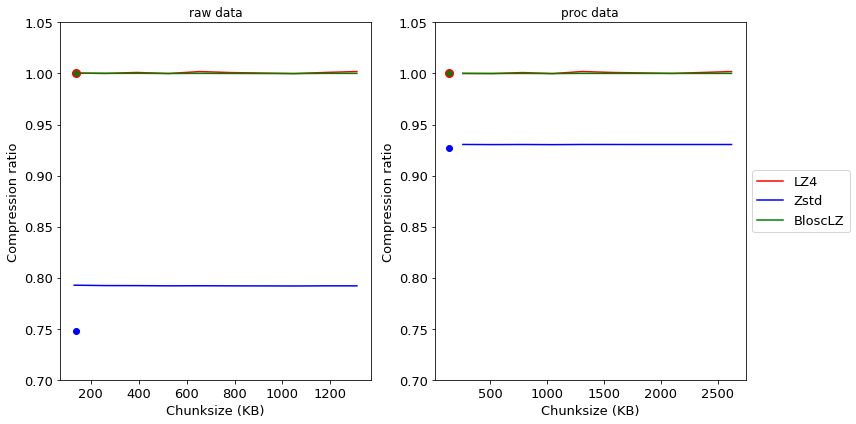

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.show()

x=lz4_raw['chunk_size_byte'].loc[0:9]
x2=lz4_proc['chunk_size_byte'].loc[33:42]

#Raw
#Line: time to compress for chunksizes
ax1.plot(x, lz4_raw['ratio'].loc[0:9], color='red', label='LZ4')
ax1.plot(x, zstd_raw['ratio'].loc[11:20], color='blue', label='Zstd')
ax1.plot(x, blosc_raw['ratio'].loc[22:31], color='green', label='BloscLZ')

#Dot: For default chunksize and time to compress
ax1.plot(lz4_raw['chunk_size_byte'].loc[10], lz4_raw['ratio'].loc[10], 'ro', markersize=8, color='red')
ax1.plot(zstd_raw['chunk_size_byte'].loc[21], zstd_raw['ratio'].loc[21], 'ro', color='blue')
ax1.plot(blosc_raw['chunk_size_byte'].loc[32], blosc_raw['ratio'].loc[32], 'ro', markersize=5, color='green')

ax1.set_xlabel('Chunksize (KB)', fontsize=13)
ax1.tick_params(axis='both', which='major', labelsize=13)

#Proc
#Line: time to compress for chunksizes
ax2.plot(x2, lz4_proc['ratio'].loc[33:42], color='red', label='LZ4')
ax2.plot(x2, zstd_proc['ratio'].loc[44:53], color='blue', label='Zstd')
ax2.plot(x2, proc_rows['ratio'].loc[55:64], color='green', label='BloscLZ')

#Dot: For default chunksize and time to compress
ax2.plot(lz4_proc['chunk_size_byte'].loc[43], lz4_proc['ratio'].loc[43], 'ro', markersize=8, color='red')
ax2.plot(zstd_proc['chunk_size_byte'].loc[54], zstd_proc['ratio'].loc[54], 'ro', color='blue')
ax2.plot(blosc_proc['chunk_size_byte'].loc[65], blosc_proc['ratio'].loc[65], 'ro', markersize=5, color='green')

ax2.set_xlabel('Chunksize (KB)', fontsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)

#Chart options
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13)
ax1.set_title('raw data')
ax2.set_title('proc data')

ax1.set_ylabel('Compression ratio', fontsize=13)
ax2.set_ylabel('Compression ratio', fontsize=13)

fig.tight_layout()

ax1.set_ylim([0.70, 1.05])
ax2.set_ylim([0.70, 1.05])

(250, 1400)

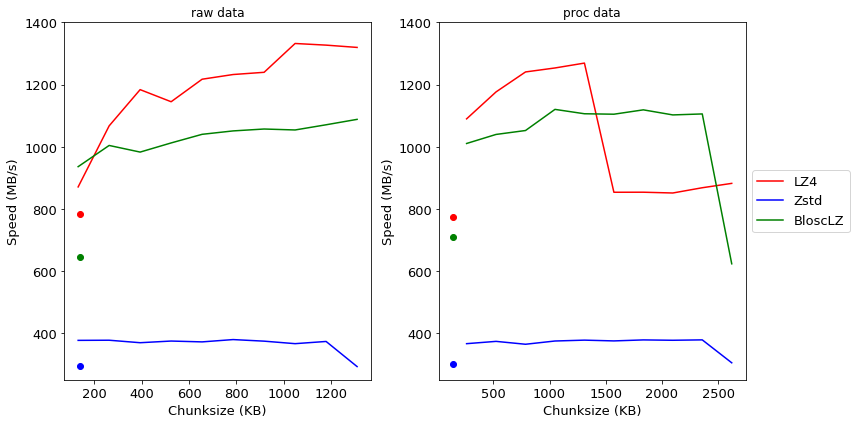

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.show()

x=lz4_raw['chunk_size_byte'].loc[0:9]
x2=lz4_proc['chunk_size_byte'].loc[33:42]

#Raw
#Line: time to compress for chunksizes
ax1.plot(x, lz4_raw['comp_mb/s'].loc[0:9], color='red', label='LZ4')
ax1.plot(x, zstd_raw['comp_mb/s'].loc[11:20], color='blue', label='Zstd')
ax1.plot(x, blosc_raw['comp_mb/s'].loc[22:31], color='green', label='BloscLZ')

#Dot: For default chunksize and time to compress
ax1.plot(lz4_raw['chunk_size_byte'].loc[10], lz4_raw['comp_mb/s'].loc[10], 'ro', color='red')
ax1.plot(zstd_raw['chunk_size_byte'].loc[21], zstd_raw['comp_mb/s'].loc[21], 'ro', color='blue')
ax1.plot(blosc_raw['chunk_size_byte'].loc[32], blosc_raw['comp_mb/s'].loc[32], 'ro', color='green')

ax1.set_ylabel('Speed (MB/s)', fontsize=13)
ax1.set_xlabel('Chunksize (KB)', fontsize=13)
ax1.tick_params(axis='both', which='major', labelsize=13)


#Proc
#Line: time to compress for chunksizes
ax2.plot(x2, lz4_proc['comp_mb/s'].loc[33:42], color='red', label='LZ4')
ax2.plot(x2, zstd_proc['comp_mb/s'].loc[44:53], color='blue', label='Zstd')
ax2.plot(x2, proc_rows['comp_mb/s'].loc[55:64], color='green', label='BloscLZ')

#Dot: For default chunksize and time to compress
ax2.plot(lz4_proc['chunk_size_byte'].loc[43], lz4_proc['comp_mb/s'].loc[43], 'ro', color='red')
ax2.plot(zstd_proc['chunk_size_byte'].loc[54], zstd_proc['comp_mb/s'].loc[54], 'ro', color='blue')
ax2.plot(blosc_proc['chunk_size_byte'].loc[65], blosc_proc['comp_mb/s'].loc[65], 'ro', color='green')

ax2.set_xlabel('Chunksize (KB)', fontsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.set_ylabel('Speed (MB/s)', fontsize=13)

#Chart options
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13)
#plt.title('Compare raw(left) and proc(right) time to compress in correlation with chunksize ', fontsize=13)
ax1.set_title('raw data')
ax2.set_title('proc data')

fig.tight_layout()

ax1.set_ylim([250, 1400])
ax2.set_ylim([250, 1400])

(200, 1300)

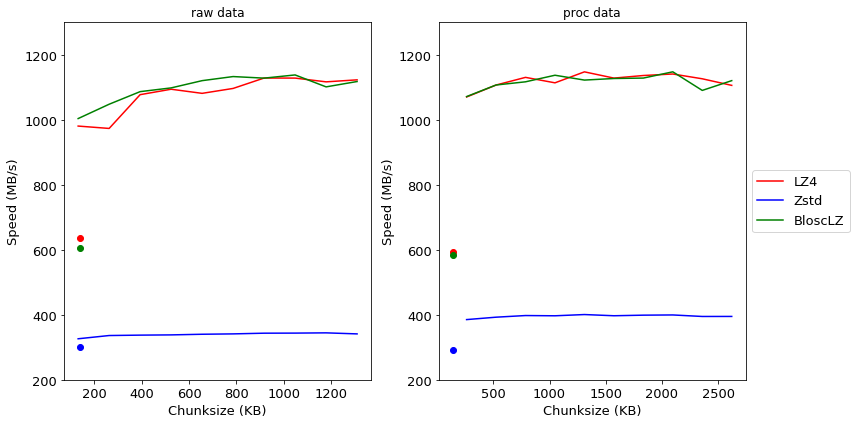

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.show()

x=lz4_raw['chunk_size_byte'].loc[0:9]
x2=lz4_proc['chunk_size_byte'].loc[33:42]

#Raw
#Line: time to compress for chunksizes
ax1.plot(x, lz4_raw['decomp_mb/s'].loc[0:9], color='red', label='LZ4')
ax1.plot(x, zstd_raw['decomp_mb/s'].loc[11:20], color='blue', label='Zstd')
ax1.plot(x, blosc_raw['decomp_mb/s'].loc[22:31], color='green', label='BloscLZ')

#Dot: For default chunksize and time to compress
ax1.plot(lz4_raw['chunk_size_byte'].loc[10], lz4_raw['decomp_mb/s'].loc[10], 'ro', color='red')
ax1.plot(zstd_raw['chunk_size_byte'].loc[21], zstd_raw['decomp_mb/s'].loc[21], 'ro', color='blue')
ax1.plot(blosc_raw['chunk_size_byte'].loc[32], blosc_raw['decomp_mb/s'].loc[32], 'ro', color='green')

ax1.set_ylabel('Speed (MB/s)', fontsize=13)
ax1.set_xlabel('Chunksize (KB)', fontsize=13)
ax1.tick_params(axis='both', which='major', labelsize=13)


#Proc
#Line: time to compress for chunksizes
ax2.plot(x2, lz4_proc['decomp_mb/s'].loc[33:42], color='red', label='LZ4')
ax2.plot(x2, zstd_proc['decomp_mb/s'].loc[44:53], color='blue', label='Zstd')
ax2.plot(x2, proc_rows['decomp_mb/s'].loc[55:64], color='green', label='BloscLZ')

#Dot: For default chunksize and result ratio
ax2.plot(lz4_proc['chunk_size_byte'].loc[43], lz4_proc['decomp_mb/s'].loc[43], 'ro', color='red')
ax2.plot(zstd_proc['chunk_size_byte'].loc[54], zstd_proc['decomp_mb/s'].loc[54], 'ro', color='blue')
ax2.plot(blosc_proc['chunk_size_byte'].loc[65], blosc_proc['decomp_mb/s'].loc[65], 'ro', color='green')

ax2.set_ylabel('Speed (MB/s)', fontsize=13)
ax2.set_xlabel('Chunksize (KB)', fontsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)

#Chart options
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13)
#plt.title('Compare raw(left) and proc(right) time to compress in correlation with chunksize ', fontsize=13)

ax1.set_title('raw data')
ax2.set_title('proc data')

fig.tight_layout()

ax1.set_ylim([200, 1300])
ax2.set_ylim([200, 1300])